<a href="https://colab.research.google.com/github/Serurays/Biomedical_Image_Analysis/blob/main/Biomedical_Image_Analysis_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

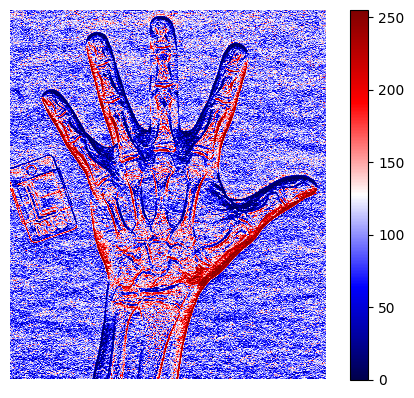

In [ ]:
import imageio.v2 as imageio
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

img = imageio.imread("bone.png")

weights = [[+1, +1, +1],
           [0, 0, 0],
           [-1, -1, -1]]

edges = ndi.convolve(img, weights)

plt.imshow(edges, cmap="seismic")
plt.axis("off")
plt.colorbar()
plt.show()

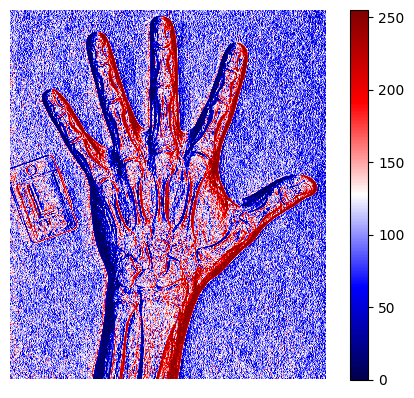

In [ ]:
weights = [[1, 0, -1],
           [1, 0, -1],
           [1, 0, -1]]

edges = ndi.convolve(img, weights)

plt.imshow(edges, cmap="seismic")

plt.colorbar()
plt.axis("off")
plt.show()

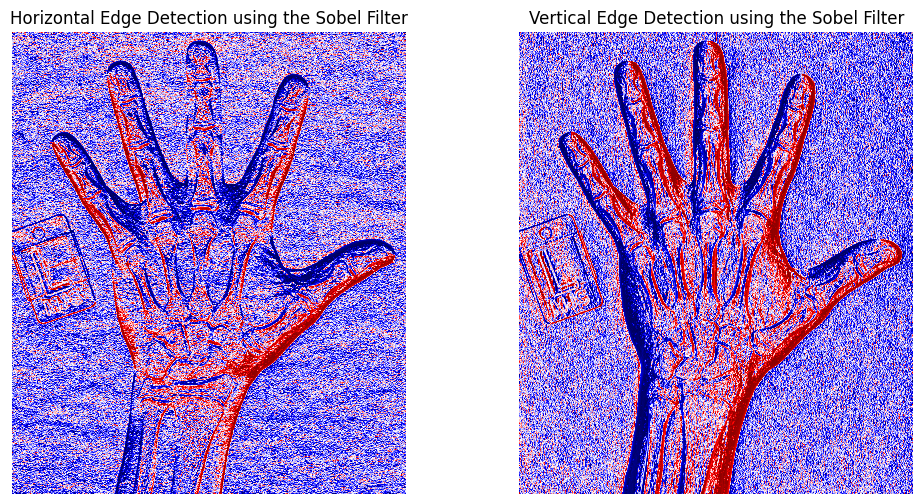

In [ ]:
edges_horizontal = ndi.sobel(img, axis=0)
edges_vertical = ndi.sobel(img, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(edges_horizontal, cmap="seismic")
axes[0].set_title("Horizontal Edge Detection using the Sobel Filter")
axes[1].imshow(edges_vertical, cmap="seismic")
axes[1].set_title("Vertical Edge Detection using the Sobel Filter")

for ax in axes:
  ax.axis("off")

plt.show()

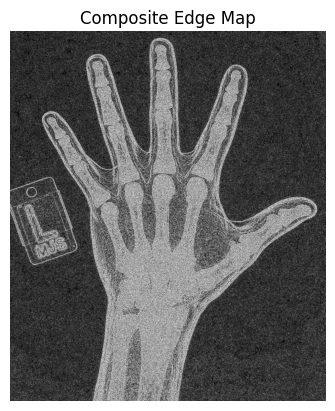

In [ ]:
import numpy as np

edges = np.sqrt(np.square(edges_horizontal) + np.square(edges_vertical))

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Composite Edge Map")
plt.show()

Number of labels: 18


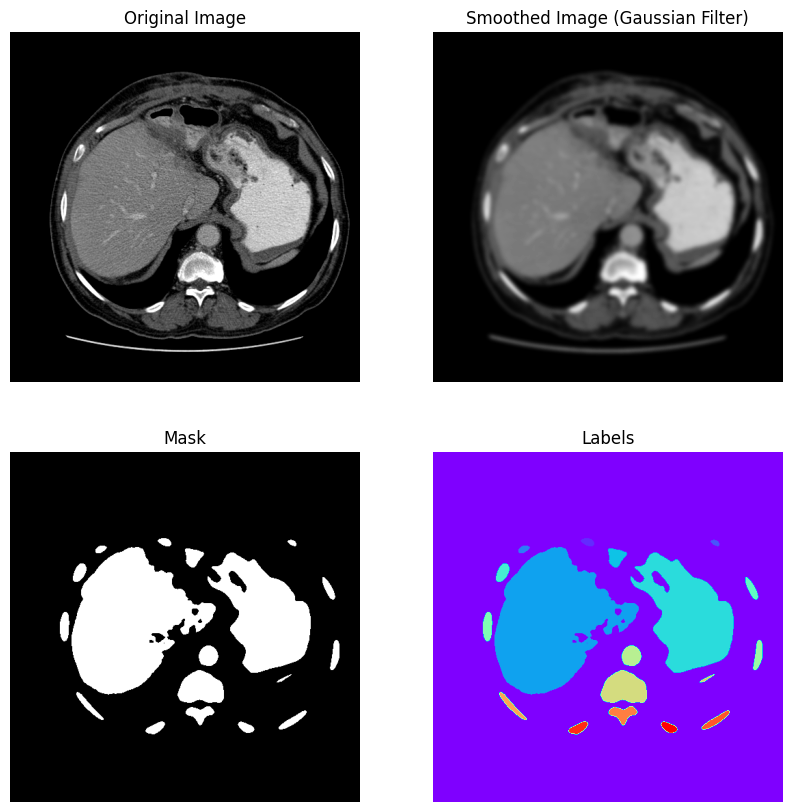

In [ ]:
img = imageio.imread("liver.dcm")

filt = ndi.gaussian_filter(img, sigma=3)

mask = filt > 110

labels, nlabels = ndi.label(mask)

print("Number of labels:", nlabels)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(img, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(filt, cmap="gray")
axes[0, 1].set_title("Smoothed Image (Gaussian Filter)")
axes[1, 0].imshow(mask, cmap="gray")
axes[1, 0].set_title("Mask")
axes[1, 1].imshow(labels, cmap="rainbow")
axes[1, 1].set_title("Labels")

for row in axes:
    for ax in row:
        ax.axis("off")

plt.show()

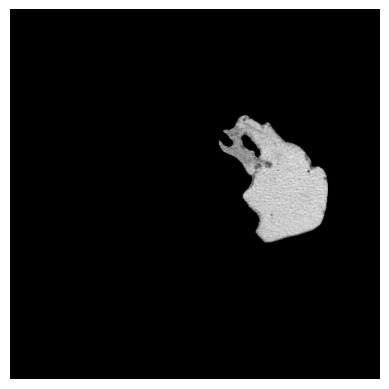

In [ ]:
plt.imshow(np.where(labels == 6, img, 0), cmap="gray")
plt.axis("off")
plt.show()

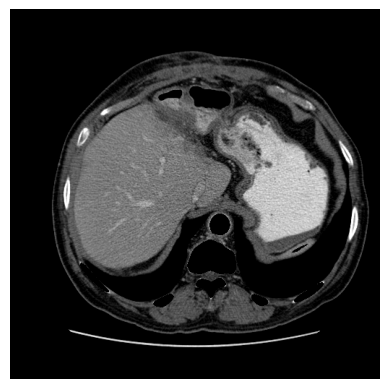

In [ ]:
plt.imshow(np.where(labels <= 10, img, 0), cmap="gray")
plt.axis("off")
plt.show()

(slice(126, 138, None), slice(216, 236, None))


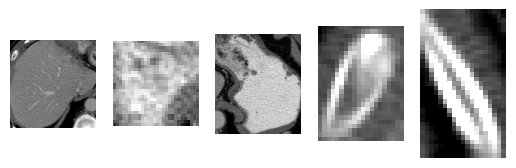

In [ ]:
boxes = ndi.find_objects(labels)

print(boxes[0])

fig, axes = plt.subplots(1, 5)

for i in range(5):
  axes[i].imshow(img[boxes[i+3]], cmap="gray")
  axes[i].axis("off")

plt.show()

Num labels: 22


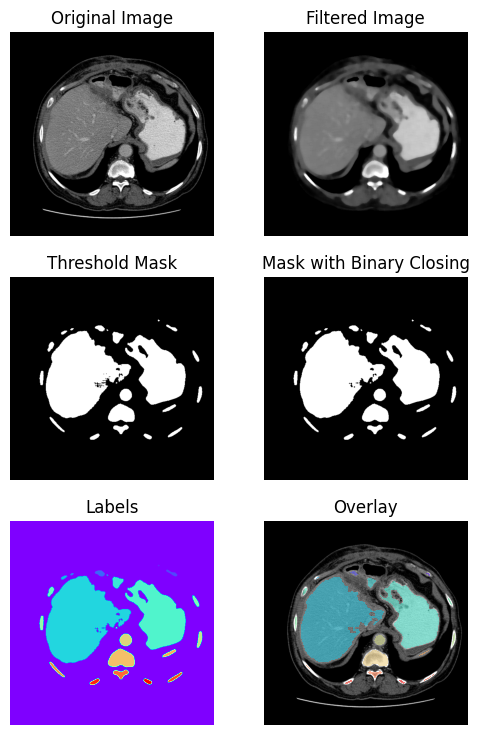

In [ ]:
img_filt = ndi.median_filter(img, size=10)

mask_start = np.where(img_filt > 110, 1, 0)

mask = ndi.binary_closing(mask_start)

labels, nlabels = ndi.label(mask)

print("Num labels:", nlabels)

overlay = np.where(labels > 0, labels, np.nan)

fig, axes = plt.subplots(3, 2, figsize=(6, 9))

axes[0, 0].imshow(img, cmap="gray")
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(img_filt, cmap="gray")
axes[0, 1].set_title("Filtered Image")

axes[1, 0].imshow(mask_start, cmap="gray")
axes[1, 0].set_title("Threshold Mask")

axes[1, 1].imshow(mask, cmap="gray")
axes[1, 1].set_title("Mask with Binary Closing")

axes[2, 0].imshow(labels, cmap="rainbow")
axes[2, 0].set_title("Labels")

axes[2, 1].imshow(img, cmap="gray", alpha=1.0)
axes[2, 1].imshow(overlay, cmap="rainbow", alpha=0.5)
axes[2, 1].set_title("Overlay")

for row in axes:
    for ax in row:
        ax.axis("off")

plt.show()

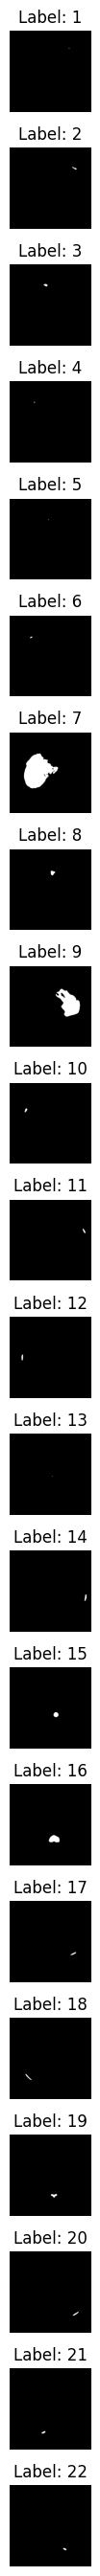

In [ ]:
fig, axes = plt.subplots(nrows=nlabels, ncols=1, figsize=(12, nlabels + 5))

for i, label_id in enumerate(range(1, nlabels + 1)):
  label_mask = labels == label_id
  axes[i].imshow(label_mask, cmap="gray")
  axes[i].set_title(f"Label: {label_id}")
  axes[i].axis("off")

plt.tight_layout()
plt.show()

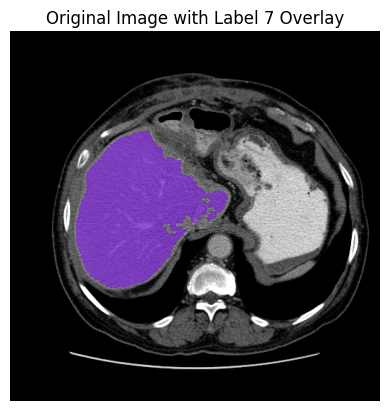

In [ ]:
label_7_mask = labels == 7

overlay = np.where(label_7_mask, labels, np.nan)

plt.imshow(img, cmap="gray", alpha=1.0)

plt.imshow(overlay, cmap="rainbow", alpha=0.5)

plt.title("Original Image with Label 7 Overlay")
plt.axis("off")
plt.show()

Number of objects: 1
Indices for first box: (slice(137, 357, None), slice(90, 304, None))


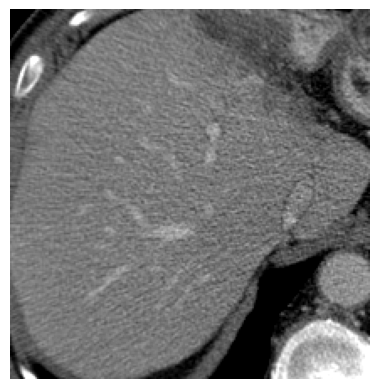

In [ ]:
bboxes = ndi.find_objects(label_7_mask)

print("Number of objects:", len(bboxes))
print("Indices for first box:", bboxes[0])

img_7 = img[bboxes[0]]

plt.imshow(img_7, cmap="gray")
plt.axis("off")
plt.show()